In [16]:
from george import kernels
import numpy as np

In [2]:
kernel = 1 *  kernels.ExpSquaredKernel(4, axes=0, ndim=1)

In [3]:
import george.gp as GP

In [4]:
gp = GP.GP(kernel)

In [5]:
gp.compute([-10])
t = np.linspace(0, 10, 100)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("/home/daniel/repositories/burst-style/burst.mplstyle")

/home/daniel/.virtualenvs/heron/local/lib/python2.7/site-packages/matplotlib/font_manager.py:279: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/daniel/.virtualenvs/heron/local/lib/python2.7/site-packages/matplotlib/__init__.py:1100: UserWarning: Bad val "True," on line #7
	"text.usetex: True,
"
	in file "/home/daniel/repositories/burst-style/burst.mplstyle"
	Key text.usetex: Could not convert "true," to boolean
  (val, error_details, msg))
/home/daniel/.virtualenvs/heron/local/lib/python2.7/site-packages/matplotlib/__init__.py:1100: UserWarning: Bad val "black," on line #9
	"text.color          : black,
"
	in file "/home/daniel/repositories/burst-style/burst.mplstyle"
	Key text.color: black, does not look like a color arg
Color tuples must be length 3
  (val, error_details, msg))


(0, 10)

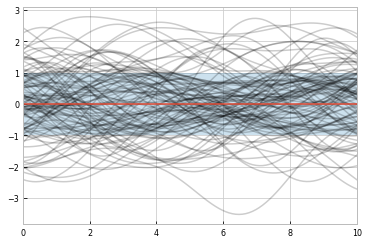

In [91]:
sample = gp.sample(t)
prediction = gp.predict([0], t, return_var=True, return_cov=False)
#plt.plot(t, prediction[0])
#plt.fill_between(t, prediction[0]+prediction[1], prediction[0]-prediction[1], alpha=0.25)

for i in xrange(100):
    sample = gp.sample(t)
    plt.plot(t, sample, alpha=0.2, color='k')

plt.plot(t, prediction[0])
plt.fill_between(t, prediction[0]+prediction[1], prediction[0]-prediction[1], alpha=0.25)

plt.xlim([0,10]);

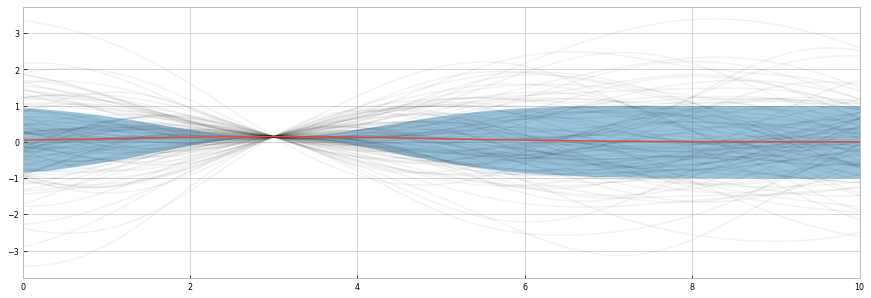

In [111]:
training_data = [3] #np.arange(2, 10, 3)
training_points = np.sin(training_data)

gp.compute(training_data)
prediction = gp.predict(training_points, t, return_var=True, return_cov=False)

plt.figure(figsize=(15, 5))

for i in xrange(100):
    sample = gp.sample_conditional(training_points, t)
    plt.plot(t, sample, alpha=0.05, color='k')

plt.plot(t, prediction[0])
plt.fill_between(t, prediction[0]+prediction[1], prediction[0]-prediction[1], alpha=0.5)

plt.xlim([0,10]);

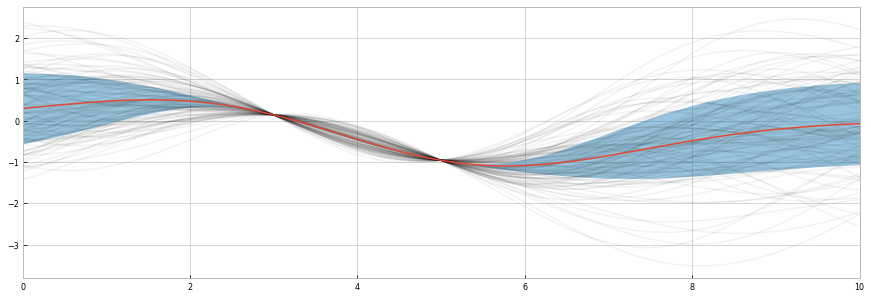

In [112]:
training_data = [3, 5] #np.arange(2, 10, 3)
training_points = np.sin(training_data)

gp.compute(training_data)
prediction = gp.predict(training_points, t, return_var=True, return_cov=False)

plt.figure(figsize=(15, 5))

for i in xrange(100):
    sample = gp.sample_conditional(training_points, t)
    plt.plot(t, sample, alpha=0.05, color='k')

plt.plot(t, prediction[0])
plt.fill_between(t, prediction[0]+prediction[1], prediction[0]-prediction[1], alpha=0.5)

plt.xlim([0,10]);

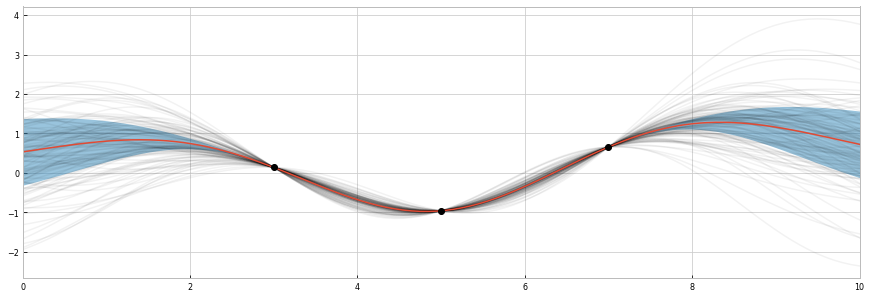

In [116]:
training_data = [3, 5, 7] #np.arange(2, 10, 3)
training_points = np.sin(training_data)

gp.compute(training_data)
prediction = gp.predict(training_points, t, return_var=True, return_cov=False)

plt.figure(figsize=(15, 5))

for i in xrange(100):
    sample = gp.sample_conditional(training_points, t)
    plt.plot(t, sample, alpha=0.05, color='k')

plt.plot(t, prediction[0])
plt.fill_between(t, prediction[0]+prediction[1], prediction[0]-prediction[1], alpha=0.5)

plt.plot(training_data, training_points, 'o', color="black")

plt.xlim([0,10]);

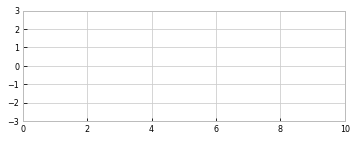

In [147]:
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
samples = []
fig, ax = plt.subplots(figsize=(5,2))
fig.set_tight_layout(True)
ax.set_xlim([0,10]);
ax.set_ylim([-3,3]);

def update(i):
    sample = gp.sample_conditional(training_points, t)
    ax.plot(t, sample, alpha=0.05, color='k')


In [148]:
anim = FuncAnimation(fig, update, frames=np.arange(0, 100), interval=200)

In [149]:
plt.show()

In [150]:
anim.save('dynamic.mp4',writer='mencoder', fps=15)

In [7]:
import lalsimulation, lal

def generate_new_points(massratio, spin1x, npoints = 300, tstart = -0.1, tend = 0.005):
    """
    
    Parameters
    ----------
    massratio : float
        The ratio of the two component masses.
    spin1x : array
        The vector of spin components for mass 1.
    spin2x : array
        The vector of spin components for mass 2.
    npoints : int
        The desired number of points in the output waveform
    tstart : float
        The start time of the output waveform.
    tend : float
        the end time of the output waveform.
    
    Outputs
    -------
    data : array
        An array of data in the format expected by the heron data object.
    
    """
    chi1_l = 0
    chi2_l = 0
    chip = 0
    thetaJ = 0
    mass2 = 15 * lal.MSUN_SI
    mass1 = mass2 / massratio
    #print mass1 / lal.MSUN_SI
    distance = 5 * lal.PC_SI
    alpha0 = 0
    phic = 0
    f_ref = 100 * lal.HertzUnit,
    waveflags = lalsimulation.SimInspiralCreateWaveformFlags()
    approximant = lalsimulation.SimInspiralGetApproximantFromString("IMRPhenomP")
    #phorder = lalsimulation.SimInspiralGetOrderFromString("IMRPhenomP0")
    #f, ax = plt.subplots(10, sharey=True, figsize=(5,15))
    data = np.zeros((npoints, 4))
    #m1 = mass1 / lal.MSUN_SI
    coaphase = 0
    
    spin1x, spin1y, spin1z = spin1x,0,0
    spin2x, spin2y, spin2z = spin1x,0,0
    flower = 10 
    fref = 10
    distance = 400 *1e6 * lal.PC_SI
    z = 0.0
    inclination = 0.0
    lambda1 = lambda2 = 0.0
    amporder = 0
    phorder = 0
    dt = (tend-tstart)/npoints
    hp, hc = lalsimulation.SimInspiralTD(coaphase, dt, 
                                         mass1, mass2,
                                         spin1x, spin1y, spin1z,
                                         spin2x, spin2y, spin2z,
                                         flower, fref, distance, z,
                                         inclination, lambda1, lambda2,
                                         waveflags, None, amporder, phorder,
                                         approximant
                                        )
    times = np.linspace(0, len(hp.data.data)*hp.deltaT, len(hp.data.data)) + hp.epoch
    data[:,-1] =  hp.data.data[(tstart<times) & (times<tend)]
    data[:,0] = times[(tstart<times) & (times<tend)]
    data[:,1] = massratio * np.ones(npoints)
    data[:,2] = spin1x * np.ones(npoints)
    return data

In [8]:
from heron import data
bbh_data = generate_new_points(0.5, 0, 200, tstart=-0.02) #np.vstack([generate_new_points(5, 0), generate_new_points(6, 0)])
bbh_test = generate_new_points(0.5, 0, npoints = 1000)
bbh = data.Data(np.atleast_2d(bbh_data[:,:1]), np.atleast_2d(bbh_data[:,-1]),  
                    target_names = ["Times"],
                    label_names = ["hp strain"],
                    test_size = 0,
                    test_targets = bbh_test[:,:1],
                    test_labels = bbh_test[:,-1]
                    )

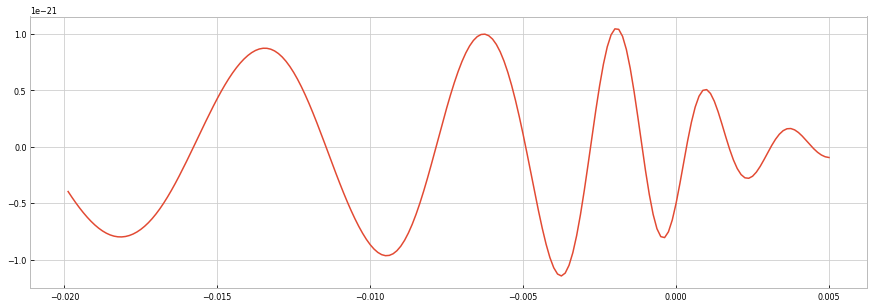

In [531]:
plt.figure(figsize=(15, 5))
plt.plot(bbh_data[:,:1], bbh_data[:,-1])

In [521]:
def neg_ln_like(p):
    gp.set_vector(p)
    return -gp.lnlikelihood(training_points)

def grad_neg_ln_like(p):
    gp.set_vector(p)
    return gp.grad_lnlikelihood(training_points)

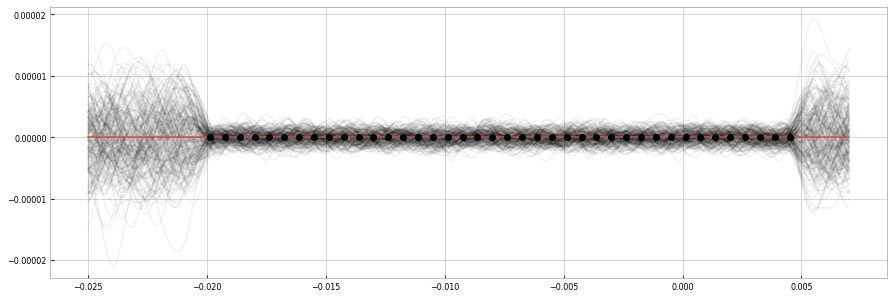

In [537]:
training_data = bbh_data[:,:1][::5]
training_points = bbh_data[:,-1][::5]

sep = training_data[1]-training_data[0]

kernel = np.std(training_points)**0.5*kernels.ExpSquaredKernel(sep**2)
gp = george.GP(kernel, tol=1e-5, solver=george.HODLRSolver, mean=-5e-23)
gp.compute(training_data)

minimize(neg_ln_like, gp.get_vector(), method="BFGS", jac=grad_neg_ln_like)

t = np.linspace(-0.025, 0.007, 1000)
gp.compute(training_data)
prediction = gp.predict(training_points, t, return_var=True, return_cov=False)

plt.figure(figsize=(15, 5))

for i in xrange(200):
    sample = gp.sample_conditional(training_points, t)
    plt.plot(t, sample, alpha=0.05, color='k')

plt.plot(t, prediction[0])
plt.fill_between(t, prediction[0]+prediction[1]**2, prediction[0]-prediction[1]**2, alpha=0.5)

plt.plot(training_data, training_points, 'o', color="black")
#plt.ylim([-2e-21, 2e-21])
#plt.xlim([0,10]);

In [9]:
# # Georgia Tech Mass ratios
ratios = [ 0.06649688,  0.07314657,  0.07979625,  0.0831211 ,  0.08644594,
        0.09309563,  0.09974532,  0.106395  ,  0.11304469,  0.11636954,
        0.11969438,  0.12634407,  0.13299376,  0.13964344,  0.14629313,
        0.14961798,  0.15294282,  0.15959251,  0.16624219,  0.17289188,
        0.17954157,  0.18619126,  0.19284095,  0.19949063,  0.20614099,
        0.21279001,  0.2194397 ,  0.22608872,  0.23273907,  0.23938943,
        0.24603845,  0.2526888 ,  0.25933716,  0.26598751,  0.27263786,
        0.27928622,  0.28593724,  0.29258693,  0.29923662,  0.33248372,
        0.39898193,  0.46547815,  0.66472407,  1.        ]

In [10]:
test_ratios = ratios[:-1] + np.diff(ratios)/2

In [122]:
bbh_data_2 = np.vstack([generate_new_points(ratio, 0, 250, tstart=-0.10, tend=0.05) for ratio in ratios[::3]])
bbh_test_2 = np.vstack([generate_new_points(ratio, 0, 250, tstart=-0.10, tend=0.05) for ratio in test_ratios[1::3]])
                        #generate_new_points(7, 0, 250, tstart=-0.005), 
                        #generate_new_points(9, 0, 250, tstart=-0.005), 
                        #generate_new_points(15, 0, 250,tstart=-0.005)])

#bbh_test_2 = np.vstack([generate_new_points(7, 0, 1000, tstart=-0.005)])#, generate_new_points(10, 0, 1000), generate_new_points(15, 0, 1000)])

In [123]:
bbh_2 = data.Data(bbh_data_2[:,:2], bbh_data_2[:,-1],
    #bbh_text[:,:2], bbh_text[:,-1],              
                    target_names = ["Times", "Mass"],
                    label_names = ["hp strain"],
                    test_size = 0,
                    test_targets = bbh_test_2[:,:2],
                    test_labels = bbh_test_2[:,-1]
                    )

In [124]:
training_data = bbh_data_2[:,:2]#[::5]
training_points = bbh_data_2[:,-1]/1e-21#[::5]

In [125]:
np.mean(np.diff(ratios[::2]))

0.028487009047619048

In [126]:
np.mean(training_points)

0.0061784598252621866

In [262]:
import george
sep = training_data[1]-training_data[0]
sep_rat = np.diff(ratios[::2])[0]/4
k0 =  np.std(training_points)**2
k1 =  kernels.ExpSquaredKernel([sep[0]**2, sep_rat**2], axes = [0,1], ndim=2)
k2 =  kernels.ExpSquaredKernel([sep[0]**2, sep_rat**2], axes = [0,1], ndim=2)
#k2 =  kernels.ExpSquaredKernel([sep[0]**2, sep_rat**2], axes = [0,1], ndim=2)
k3 = kernels.Matern52Kernel([sep[0]**2, sep_rat**2], axes=[0,1], ndim=2)
kernel = k0+k3 #k0 + (k1 * k2)
gp = george.GP(kernel, tol=1e-10, solver=george.HODLRSolver, mean=.0067709526986988872)
gp.compute(training_data)

In [327]:
def produce_plots(number, pointsa, pointsb):
    def neg_ln_like(p):
        gp.set_vector(p)
        return -gp.lnlikelihood(training_points[i])

    def grad_neg_ln_like(p):
        gp.set_vector(p)
        return gp.grad_lnlikelihood(training_points[i])
    
    np.random.seed(3)
    i = np.random.choice(len(training_points), size=number)
    t = np.linspace(-0.1, 0.05, 1000)
    t = np.vstack([t, [0.06649688]*len(t)]).T
    gp.compute(training_data[i])
    minimize(neg_ln_like, gp.get_vector(), method="BFGS", jac=grad_neg_ln_like)
    prediction = gp.predict(training_points[i], t, return_var=True, return_cov=False)
    t1 = np.linspace(-0.1, 0.05, 1000)
    t2 = np.vstack([t1, [0.139688]*len(t)]).T
    prediction2 = gp.predict(training_points[i], t2, return_var=True, return_cov=False)
    
    wavedata = []
    waveuncer = []
    for j in np.linspace(ratios[0], ratios[-1], 100):
        t = np.linspace(-0.1, 0.05, 1000)
        t = np.vstack([t, [j]*len(t)]).T
        prediction = gp.predict(training_points[i], t, return_var=True, return_cov=False)
        wavedata.append(prediction[0])
        waveuncer.append(prediction[1])
        
    #f, ax = plt.subplots(1,2, figsize=(10,20))
    #plt.tight_layout()
    
    ax[0].imshow(np.array(wavedata)*1e-21, aspect=.2, origin="lower", extent=(-0.1, 0.05, ratios[0], ratios[-1]), vmax=2e-21, vmin=-2e-21)
    pointsa[0].set_data(training_data[i, 0][-10:], training_data[i, 1][-10:])
    pointsb[0].set_data(training_data[i, 0][-10:], training_data[i, 1][-10:])
    #ax[0].set_ylabel("Mass ratio, q")
    #ax[0].set_xlabel("Time, t")
    #ax[0].grid(False)
    ax[1].imshow(np.array(waveuncer)*1e-21, aspect=.2, origin="lower", extent=(-0.1, 0.05, ratios[0], ratios[-1]), vmax=2e-21, vmin=-2e-21)
    
    #ax[1].set_ylabel("Mass ratio, q")
    #ax[1].set_xlabel("Time, t")
    #ax[1].grid(False)
    
    #ax[0].colorbar()


In [328]:
pointsa[0]

In [ ]:
#produce_plots(1000)
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation
f, ax = plt.subplots(1,2, figsize=(10,5))
plt.tight_layout()
#ax[0].imshow(np.array(wavedata)*1e-21, aspect=.2, origin="lower", extent=(-0.1, 0.05, ratios[0], ratios[-1]), vmax=2e-21, vmin=-2e-21)
#ax[0].plot(training_data[i, 0][-10:], training_data[i, 1][-10:], 'x', color="white", alpha = 0.4)
ax[0].set_ylabel("Mass ratio, q")
ax[0].set_xlabel("Time, t")
ax[0].grid(False)
pointsa = ax[0].plot(training_data[i, 0][-10:], training_data[i, 1][-10:], 'x', color="white", alpha = 0.4)
pointsb = ax[1].plot(training_data[i, 0][-10:], training_data[i, 1][-10:], 'x', color="white", alpha = 0.4)
#ax[1].imshow(np.array(waveuncer)*1e-21, aspect=.2, origin="lower", extent=(-0.1, 0.05, ratios[0], ratios[-1]), vmax=2e-21, vmin=-2e-21)
#ax[1].plot(training_data[i, 0][-10:], training_data[i, 1][-10:], 'x', color="white", alpha = 0.4)
ax[1].set_ylabel("Mass ratio, q")
ax[1].set_xlabel("Time, t")
ax[1].grid(False)
anim = FuncAnimation(f, produce_plots, frames=np.arange(10, 1000), fargs=(pointsa, pointsb), interval=30)
anim.save("test2.mpg", writer="mencoder", dpi=300)

In [309]:
len(training_data)

3750

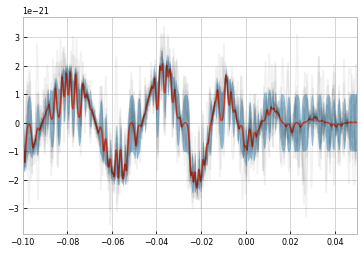

In [269]:
plt.plot(t[:,0], prediction[0]*1e-21)
plt.fill_between(t[:,0], prediction[0]*1e-21+prediction[1]**.5*1e-21, prediction[0]*1e-21-prediction[1]**.5*1e-21, alpha=0.5)

for j in xrange(10):
    sample = gp.sample_conditional(training_points[i], t)
    plt.plot(t, sample*1e-21, alpha=0.05, color='k')
plt.xlim(-0.1,0.05);
#plt.ylim([-2.5e-20, 2.5e-21]);

In [270]:
wavedata = []
waveuncer = []
for j in np.linspace(ratios[0], ratios[-1], 100):
    t = np.linspace(-0.1, 0.05, 1000)
    t = np.vstack([t, [j]*len(t)]).T
    prediction = gp.predict(training_points[i], t, return_var=True, return_cov=False)
    wavedata.append(prediction[0])
    waveuncer.append(prediction[1])

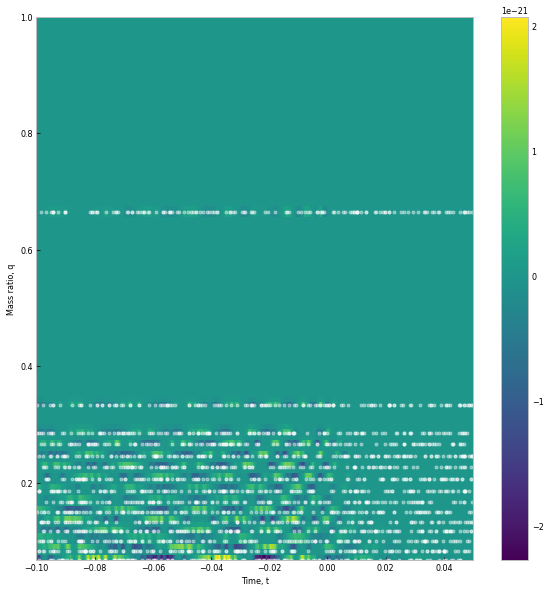

In [271]:
plt.figure(figsize=(10,10))
plt.imshow(np.array(wavedata)*1e-21, aspect=.2, origin="lower", extent=(-0.1, 0.05, ratios[0], ratios[-1]))
plt.plot(training_data[i, 0], training_data[i, 1], '.', color="white", alpha = 0.4)
plt.ylabel("Mass ratio, q")
plt.xlabel("Time, t")
plt.grid(False)
plt.colorbar()


In [217]:
training_data[i]

array([[-0.01081042,  0.18619126],
       [ 0.01318962,  0.16624219],
       [-0.05700719,  0.33248372],
       [ 0.00058872,  0.16624219],
       [-0.09961074,  0.28593724],
       [ 0.0311845 ,  0.11636954],
       [-0.06721157,  0.22608872],
       [-0.07622454,  0.11636954],
       [-0.05820852,  0.28593724],
       [ 0.02459478,  0.24603845]])

In [166]:
from scipy.optimize import minimize
minimize(neg_ln_like, gp.get_vector(), method="BFGS", jac=grad_neg_ln_like)

      fun: 2579.3406176131175
 hess_inv: array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])
      jac: array([ -4.99319694e-01,   2.39805253e+03,  -4.94095949e+01])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 22
      nit: 0
     njev: 10
   status: 2
  success: False
        x: array([ -1.37719208, -14.8370724 , -10.02636926])